# Data / Problem Description

Repository Link: https://github.com/mckomisarek878/MNIST-Digit-Classifier-with-CNN
__________________________________________________________________________

**Problem**

Hand written digit recognition is instantaneous for humans but it is not so simple for a computer. Basic and even advanced statistical algorithms will not be able to find a consistent solution because of the problems inherent nonlinearity.

**Why is this important?**

Training a computer to recognize handwritten digits can help many organizations such as in the following examples:

- Automation of mailing systems (recognizing handwritten addresses)
- Solving math problems from images (eg. photomath, etc.)
- Liscence plate cameras for running red lights

**Solution**

Multiple Machine Learning algorithms have been shown to solve this problem but many (such as KNN) can be extrememly inefficient due to the vast number of features. A Convolutional Neural Network is a better approach because of its ability to achieve extremely high accuracy and fast training time.

**Data**

Link: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

This dataset comes from a Keras libarary. It contains 70,000 grayscale images of handwritten digits of 28x28 pixels. The dataset also contains the respective labels of training examples.

The dataset is comes pre-split into training and testing data. The training data consists of 60,000 of those images and labels. The testing data consists of 10,000 images and labels. Making the shapes of training and testing data as follows:

- Training Examples: (60000,28,28)
- Training Labels: (60000,)
- Test Examples: (10000,28,28)
- Test Labels: (10000,)
____________________________________________________________________________

# EDA

**Importing Necessary Libraries**

In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting and visualization
import tensorflow as tf # nueral networks
from tensorflow.keras.datasets import mnist # dataset

**Loading Dataset into NumPy Array**

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


**Observe Shape of Data**

In [3]:
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


**Visualize Training Examples and Labels**

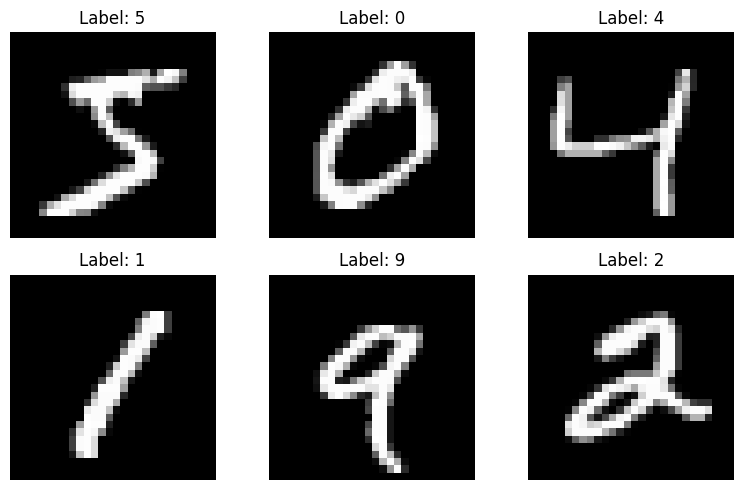

In [4]:
plt.figure(figsize=(8, 5))

for i in range(6):
    image = x_train[i]
    label = y_train[i]

    plt.subplot(2, 3, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**Visualize distribution**

Lets ensure our dataset is balanced so that we our model is not trained to identify one digit more than the others. We will do this by making a histogram of the distribution of different labels.

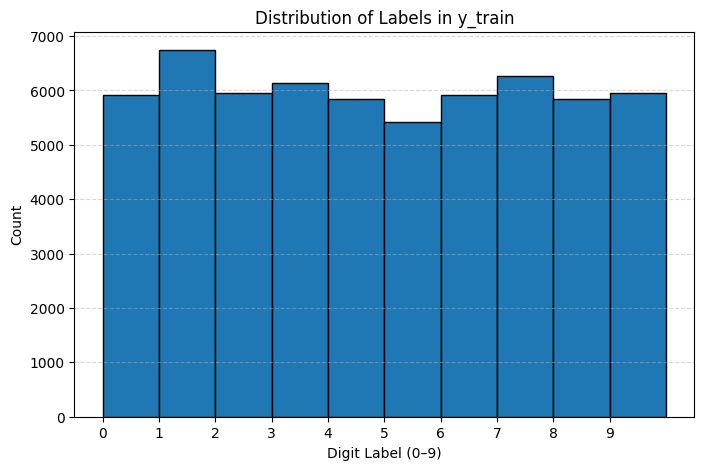

In [5]:
plt.figure(figsize=(8,5))

plt.hist(y_train, bins=10, range=(0,10), edgecolor='black')
plt.xticks(range(10))
plt.xlabel("Digit Label (0–9)")
plt.ylabel("Count")
plt.title("Distribution of Labels in y_train")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

Our dataset looks pretty balanced, so we will not have to do any data engineering to make it more balanced

**Inspection of Values**

It is a necessity to normalize our data before throwing it into a machine learning model. Common practice in computer vision is to normalize pixel values to range between 0 and 1. Before we do this we will inspect the minimum and maximum values of our data.

In [6]:
print(f'Max Pixel Values: {x_train.max()}')
print(f'Min Pixel Values: {x_train.min()}')

Max Pixel Values: 255
Min Pixel Values: 0


**Normalization**

We have found that our data ranges from 0 - 255 which is very common for images. We will have to normalize our values to take on a range from 0 - 1 by dividing the dataset by the maximum value (255).

In [7]:
x_train = (x_train.astype('float32') / (255))
x_test = (x_test.astype('float32') / (255))


# Model Building / Training

____________________________________________________________________________

**--CNN Approach--**

We will use a nueral network framework, TensorFlow to develop a CNN to identify hand-written digits. CNNs are a good approach because they are engineered to work with 2 dimensional shapes like our data by applying filters over certain sections of the image to identify lines, and eventual entire shapes.

We will implement a couple different models to from a naiive approach to a more robust, intuitive approach to developing CNNs.

**--Multiclass Classification and Softmax--**

This problem falls under the category of Multiclass Classification. That means that each training examples will be 1 of many different classes and only 1. The proper output will rely on the softmax activation function. The softmax activation function will output a probability distrobution that represents how likely a training example is to be a part of each class.

**--Metrics--**

Since this is multiclass classification, the metrics used to evaluate model performance will the following

- Loss: Categorical Crossentropy is the proper loss function to represent the models error when classifying digits. The lower this is, the better.

- Accuracy: The number of training examples correctly labeled.
_____________________________________________________________________________


**Plotting Function**

This function will plot our training and test metrics after each epoch. This will allow us to visualize how well our model is generalizing and will give us insight as to when the model starts to overfit.

In [8]:
def plot_metric(history, metric_name):
    plt.figure(figsize=(7,5))

    # Plot training metric
    plt.plot(history.history[metric_name], label=f"Train {metric_name}")

    # Plot validation metric if available
    val_name = "val_" + metric_name
    if val_name in history.history:
        plt.plot(history.history[val_name], label=f"Validation {metric_name}")

    plt.title(f"Training vs Validation {metric_name.capitalize()}")
    plt.xlabel("Epoch")
    plt.ylabel(metric_name.capitalize())
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

**CNN #1**

The first model we will make is going to be a CNN with only 1 convolutional layer and a flatten layer for the output layer which will be a dense layer predicting 1 of 10 digits. We will not utilize any regularization techniques like dropout or pooling.

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8709 - loss: 0.4754 - val_accuracy: 0.9674 - val_loss: 0.1158
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9701 - loss: 0.1073 - val_accuracy: 0.9763 - val_loss: 0.0777
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9810 - loss: 0.0668 - val_accuracy: 0.9788 - val_loss: 0.0656
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9858 - loss: 0.0486 - val_accuracy: 0.9823 - val_loss: 0.0575
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9892 - loss: 0.0391 - val_accuracy: 0.9808 - val_loss: 0.0586
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9905 - loss: 0.0340 - val_accuracy: 0.9799 - val_loss: 0.0577
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9925 - loss: 0.0265 - val_accuracy: 0.9806 - val_loss: 0.0599
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9936 - loss: 0.0229 - val_accuracy: 0.

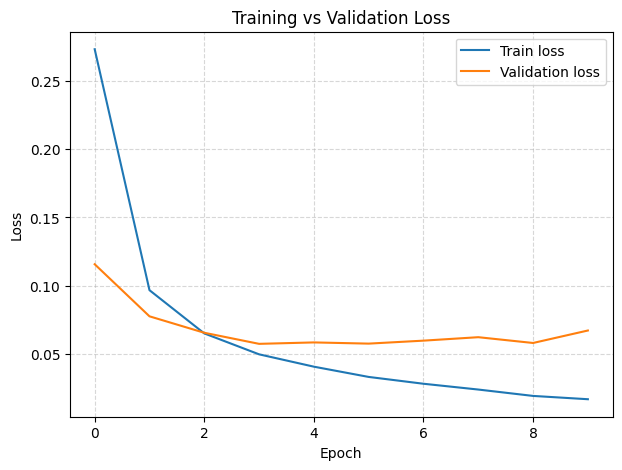

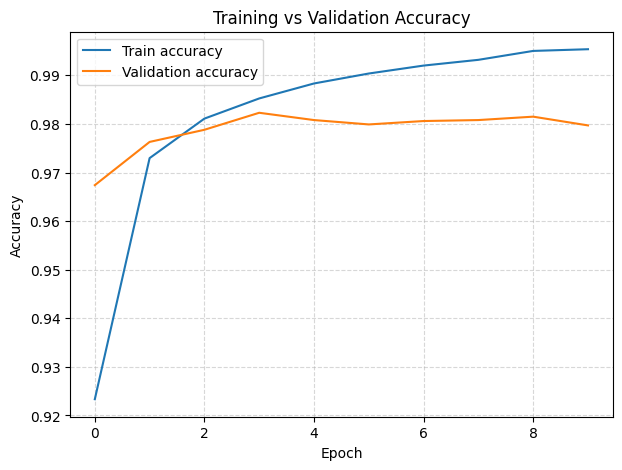

In [11]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model_1.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_data = (x_test, y_test)
)

plot_metric(history, 'loss')
plot_metric(history, 'accuracy')

**CNN #2**

As we can see, the naive model performs extrememly well and gets 0.99 accuracy on training and 0.98 accuracy on test data. Given that this network was very shallow I think that we can increase the size of the architecture to reach over 0.99 accuracy on test data. In the second model, we will use 3 convolutional layers and 3 dense layers.

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.8929 - loss: 0.3281 - val_accuracy: 0.9839 - val_loss: 0.0528
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9871 - loss: 0.0416 - val_accuracy: 0.9879 - val_loss: 0.0395
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9921 - loss: 0.0242 - val_accuracy: 0.9874 - val_loss: 0.0399
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9947 - loss: 0.0160 - val_accuracy: 0.9898 - val_loss: 0.0357
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9951 - loss: 0.0137 - val_accuracy: 0.9890 - val_loss: 0.0378
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9968 - loss: 0.0097 - val_accuracy: 0.9876 - val_loss: 0.0422
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9969 - loss: 0.0092 - val_accuracy: 0.9892 - val_loss: 0.0412
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9983 - loss: 0.0054 - val_ac

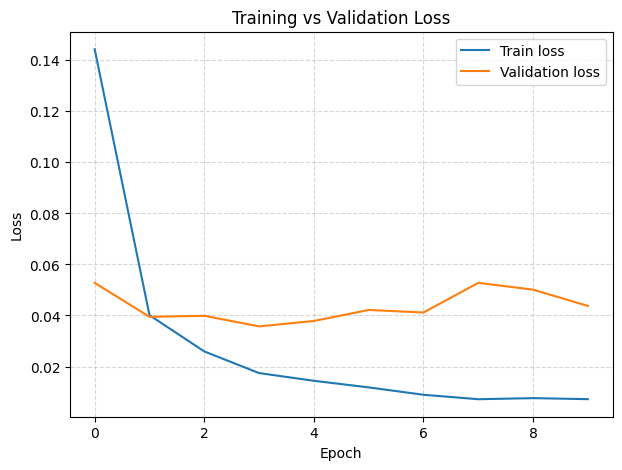

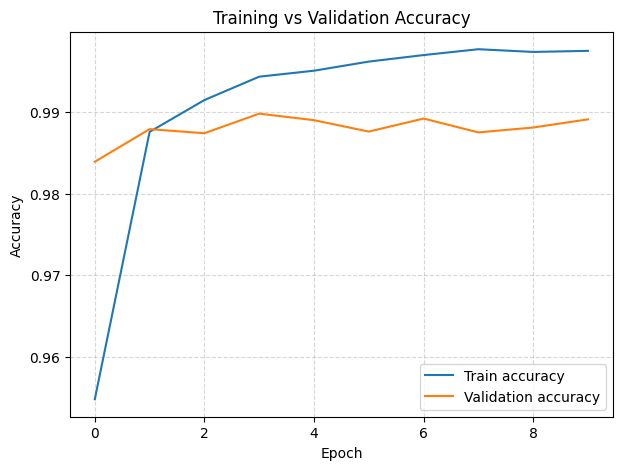

In [14]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(64,3,activation='relu'),
    tf.keras.layers.Conv2D(128,3,activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model_2.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_data = (x_test, y_test)
)

plot_metric(history, 'loss')
plot_metric(history, 'accuracy')

**CNN #3**

After greatly increasing the size of the model architecture in CNN #2, we can see that the model takes several times longer to train and our test accuracy still cannot quite break 0.99.

In the final model, we will use an architecture that is not quite as simple as CNN #1 but not quite as complex as CNN #2. This change on its own will not magically lead to better performance, so we will add regularization via pooling and dropout layers to increase the speed of our model and allow for better generalization. Hopefully this will lead to a 0.99 test accuracy.

We will use a common appraoch in computer vision which is adding pooling layers after each convolutional layer and a dropout layer once before the output layer. We will use max pooling which will select the most significant activations, for the model to use which I hypothesize will help the mdoel generalize because different digits have different prominent features such as a 9 having a fully enclosed circle.

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8089 - loss: 0.6155 - val_accuracy: 0.9795 - val_loss: 0.0634
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9711 - loss: 0.0984 - val_accuracy: 0.9854 - val_loss: 0.0442
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9806 - loss: 0.0639 - val_accuracy: 0.9888 - val_loss: 0.0340
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9847 - loss: 0.0501 - val_accuracy: 0.9907 - val_loss: 0.0288
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9879 - loss: 0.0400 - val_accuracy: 0.9910 - val_loss: 0.0300
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9890 - loss: 0.0367 - val_accuracy: 0.9913 - val_loss: 0.0268
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9908 - loss: 0.0300 - val_accuracy: 0.9919 - val_loss: 0.0256
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9902 - loss: 0.0294 - val_accuracy: 0

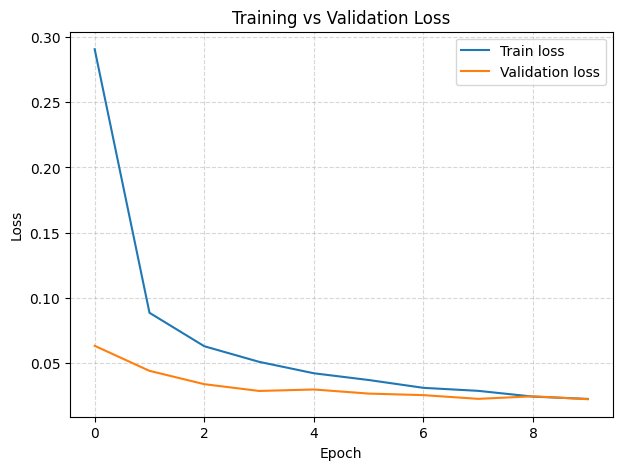

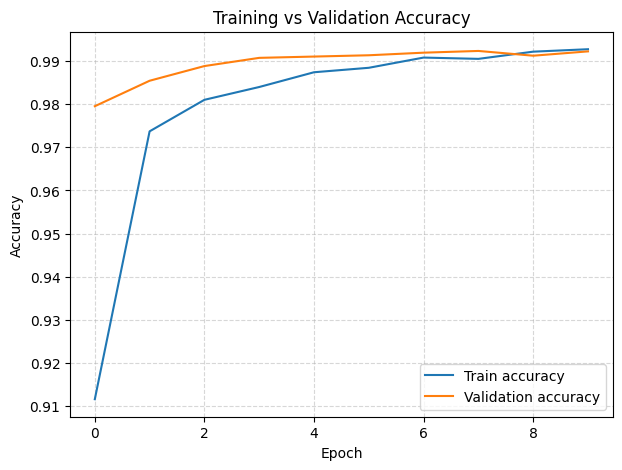

In [15]:
model_3 = tf.keras.Sequential([
    # define input shape
    tf.keras.layers.Input(shape=(28,28,1)),
    # convolutional layers to detect edges / shapes
    # max pooling to select the most significant activations
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # convert to 1d tensor for dense layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    # softmax gives probabilities for each digit
    tf.keras.layers.Dense(10, activation='softmax'),
])

# compile model
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# train model while storing per-epoch metrics
history = model_3.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_data = (x_test, y_test)
)
# plot metrics
plot_metric(history, 'loss')
plot_metric(history, 'accuracy')


# Results

**Preface**

We constructed 3 different CNNs with 3 different architectures to solve the problem of identifying hand-written digits. The first model had a very small architecture while the second model had a much larger architecture. Both of these models achieved 0.99 accuracy on training data and 0.98 accuracy on testing data. The second model showed us that the size of the architecture alone would not give us better results. In an attempt to achieve 0.99 accuracy on test data, we had to build a third model which was more civilized and utilized regularization techniques (max pooling and dropout).

**Final Model Results**
Our final and third model which used regularization did reach 0.99 test accuracy as well as keeping the 0.99 training accuracy. Both of these metrics were extrememly close to each other as well (0.9928 on training data and 0.9922 on unseen test data on the 10th epoch).

**Hyper Parameter Tuning**

There were not many hyper parameters tuned. Those experimented with were the kernel size of convolutional layers and the dropout probability in our 3rd model. A kernel size of 5 led to no better performance which was expected because the our number of features were so small for computer vision. Dropout probability did not seem to matter too much either but performed the best at 0.25.

**Tradeoffs**
Not all metrics were better with the 3rd and final model. Training loss and training accuracy were actually lower than previous models. Training loss for our final model was 0.0219 on the 10th epoch while training loss for our second model was 0.0068 on our second model. The training accuracy was also slightly higher on the same epoch of our second model as well.

Although the training accuracy and training loss was lower in previous models, this is an acceptable tradeoff because our 3rd and final model generalize better and reached the beloved >0.99 test accuracy.

**Visualization**

An accuracy score below 1 means that at least one of of the variables were misclassified. We can observe which which handwritten digits were misclassified via a confusion matrix. See confusion matrix and interpretation below:



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


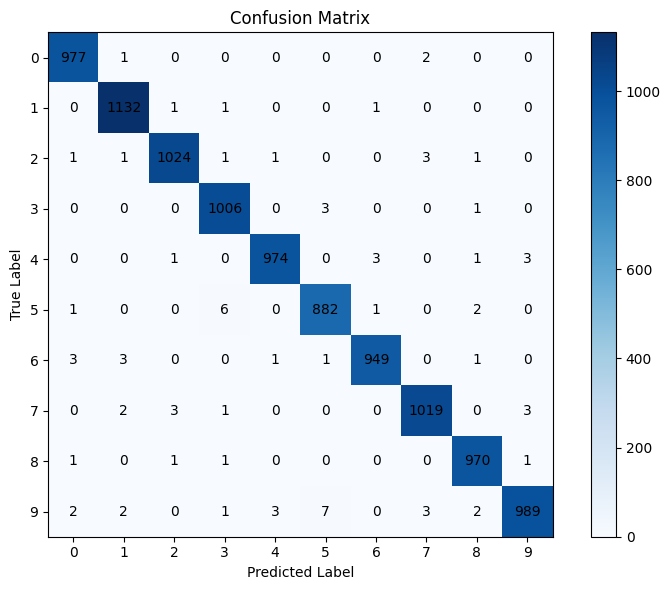

In [16]:
from sklearn.metrics import confusion_matrix

# 1. get model predictions (probabilities)
y_pred_probs = model_3.predict(x_test)
# 2. convert to class labels (0–9)
y_pred = np.argmax(y_pred_probs, axis=1)

# 3. compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 4. plot confusion matrix
plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()

# Show numbers inside each cell
for i in range(10):
    for j in range(10):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.xticks(range(10))
plt.yticks(range(10))
plt.tight_layout()
plt.show()


**Confusion Matrix Interpretation**

Our confusion matrix is very diagonal which means almost the entirety of the test data was classified correctly.

That being said, there were some common errors made by our model. Numbers with similar shapes were confused more than others:

- 5 and 3 were confused by our model the most. This is because 5 and 3 both have a curved bottom shaped like a backwards 'c' and in hand writing, often a curved top although facing different directions.

- 9 and 7 were also confused with each other as both have a line going down on the right side and a horizontalish line on top. If a 7 has pixels enclosing the top, it will be indistinguishable from a 9.

# Conclusion

In this project, we explored the task of handwritten digit recognition using three progressively more sophisticated convolutional neural networks. MNIST is a well-structured benchmark dataset, yet the modeling choices still revealed important insights about architecture complexity, regularization, and generalization.

**Model Comparison and Interpretation of Results**

Across all three models, one notable theme was that none of the architectures ever meaningfully overfit. Training and validation accuracy stayed extremely close throughout, even for the deeper models. This behavior is typical for MNIST because the dataset is large, clean, and well-curated.

Despite the low risk of overfitting, the models still benefited from regularization techniques such as max pooling and dropout. In Model 3, adding these methods helped stabilize training and improve generalization performance, allowing the network to reach 0.99 accuracy on the test set, something neither of the first two models achieved.

This highlights an important takeaway: regularization can be beneficial even when overfitting is not visually present, because it can help the network focus on more salient features and reduce unnecessary noise in the learned representations.

**What Helped Improve Performance**

Several architectural changes contributed positively to test performance:

Pooling layers reduced spatial dimensions, increased computational efficiency, and helped the model learn more abstract features.

Dropout eliminated co-adaptation of neurons, improving generalization despite the absence of explicit overfitting.

A balanced model size (not too small like Model 1, not excessively deep like Model 2) produced the best trade-off between accuracy and training speed.

Using multiple convolutional layers provided a stronger feature extractor than the one-layer baseline.

As a result, Model 3 achieved the best validation performance while also training faster than Model 2.

**What Did Not Help**

Simply increasing model depth (Model 2) did not lead to better results.
Even though Model 2 was more expressive, it trained slower and still plateaued at ~0.98 validation accuracy.

Training for more epochs offered minimal benefit.
Performance plateaued around epoch 6 in every model. Since the curves were stable and no overfitting emerged, the number of epochs was not a critical factor.

Large dense layers after convolution blocks offered almost no improvement for MNIST specifically.

**Key Learnings and Takeaways**

Bigger is not always better.
The deepest model was not the best-performing model.

Regularization can improve generalization even without obvious overfitting.
Pooling and dropout improved feature learning and helped reach 0.99 accuracy.

MNIST converges quickly.
Models stabilized early, meaning future training can safely stop after 6 epochs or sooner.

Architectural balance matters.
Model 3 demonstrated that combining moderate depth with thoughtful regularization yields the strongest performance.

**Future Improvements**

Although the final model achieved strong results, several extensions could push performance even further or demonstrate more advanced deep learning techniques:

- Add Batch Normalization to stabilize and speed up training.

- Use data augmentation to artificially increase dataset variability.

- Experiment with alternative optimizers (RMSprop, SGD + momentum).

- Apply learning rate scheduling.


Each of these approaches could improve robustness or push accuracy slightly beyond 99%.

**Final Thoughts**

This project demonstrated the full deep-learning pipeline: EDA, preprocessing, model development, evaluation, and interpretation. Through iterative experimentation, we observed how architectural decisions influence generalization, and how regularization can play a role even when overfitting is not obvious. Ultimately, we produced a model that is both efficient and highly accurate, achieving strong real-world performance on the MNIST handwritten digit dataset.